In [6]:
# Ignore this block -- it's for the documentation build
try:
    import os, sys
    sys.path.insert(1, os.path.abspath('/home/runner/work/psi4/psi4/code/objdir/stage//usr/local/psi4/lib/'))
except ImportError:
    pass

# This is the important part
import psi4
psi4.core.set_output_file('output.dat', False)

In [7]:
%%time
#! Sample HF/cc-pVDZ H2O Computation

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

CPU times: user 280 ms, sys: 5.84 ms, total: 286 ms
Wall time: 290 ms


-76.0266327350902

In [8]:
%%time
#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

CPU times: user 269 ms, sys: 8.78 ms, total: 278 ms
Wall time: 279 ms


-38.92533462893707

In [9]:
%%time
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!
CPU times: user 806 ms, sys: 13.5 ms, total: 819 ms
Wall time: 826 ms


-76.02703272937481

In [10]:
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

In [11]:
%time
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.53 µs


In [12]:
psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

-0.0022355823909805178

In [13]:
%%time
#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.37 s, sys: 1.37 s, total: 6.74 s
Wall time: 9.01 s


In [15]:
psi4.core.print_out('output.dat')

In [37]:
%%time
import numpy as np
#! Example potential energy surface scan and CP-correction for Ar2

ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = np.arange(3.5, 6, 0.25)

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
energy_vals = []
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    energy_vals.append(e)
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            3.8                        -0.069454
            4.0                        -0.122889
            4.2                        -0.116450
            4.5                        -0.095152
            4.8                        -0.073689
            5.0                        -0.055968
            5.2                        -0.042323
            5.5                        -0.032099
            5.8                        -0.024511
CPU times: user 56 s, sys: 5.31 s, total: 1min 1s
Wall time: 1min 3s


In [38]:
def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )

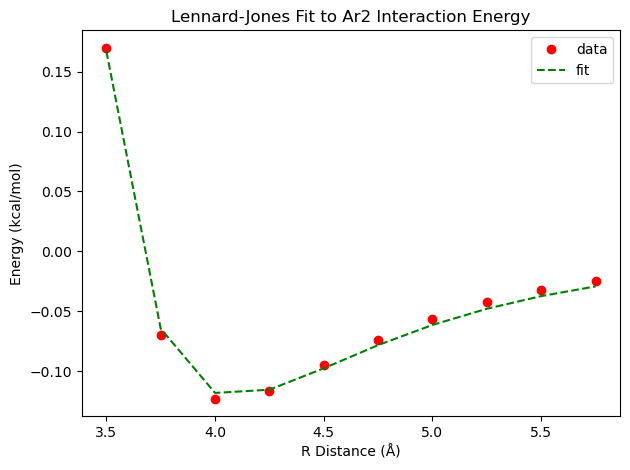

In [51]:
# Use scipy curve_fit to fit this curve to a lennard-jones potential with parameters sigma and eps as below
from scipy.optimize import curve_fit
popt, pcov = curve_fit(lj, Rvals, energy_vals)

# plot the fit
import matplotlib.pyplot as plt
plt.plot(Rvals, energy_vals, 'ro', label='data')
plt.plot(Rvals, lj(Rvals, *popt), 'g--', label='fit')
plt.xlabel('R Distance (Å)')
plt.ylabel('Energy (kcal/mol)')
plt.legend()
plt.title("Lennard-Jones Fit to Ar2 Interaction Energy")

# make the plot look nice
plt.tight_layout()
plt.savefig('lj_fit.png')
